## Leveraging MySQL Queries with Python

SQL and Python are two of the most relevant programming languages in Data Science.

Whilst different in nature and purpose, there could be a lot of synergy when using both languages together. In order to prove that, I took the lessons from the excellent Maven Analytics' Course "Advanced SQL: MySQLData Analysis & Business Intelligence" (link below) taught by John Pauler and used Python to leverage the results from the queries.

[Advanced SQL: MySQL Data Analysis & Business Intelligence](https://www.udemy.com/course/advanced-sql-mysql-for-analytics-business-intelligence/)

It is important to highlight that, as a beginner in both languages, there could be many ocurrences of unintended complicated code and bad practices, but I regard that as part of the learning process :)

Without further ado, let's jump into it.

---

*- Importing libraries*

There are other alternatives to connect MySQL to Python. For this project, it will be used the 'mysql.connector' library.

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here is an example of technical limitation. I tried to hide the cell input because it contains password, but I wasn't able to. Therefore, I erased the cell used to connect to the database, but the code is:

*mydb = mysql.connector.connect(host = 'localhost',
                              user = 'root',
                              password = 'yourpassword',
                              database = 'mavenfuzzyfactory')*

*print('Database connection successful')*

Fron now on I can use this Python IDE to write queries and extract results from the database.

---

*- Writing queries in Python*

It is worth to highlight that I tried to customize some answers based on what I thought would make more sense in the occasion, therefore, this is not a simple copy of the course's proposed solutions.

Queries will be executed using the pd.read_sql_query() function and will be named as follows:

"query_number of the lesson_sequential order"
Example: Lesson 18, second query written = query_18_2

---

**Mid-course Project (Section 6: Lesson 50 - 52)**

*1.	Gsearch seems to be the biggest driver of our business. Could you pull monthly trends for gsearch sessions and orders so that we can showcase the growth there?*

In [3]:
query_51_1 = '''
SELECT
    MONTH(ws.created_at) AS 'month', 
    COUNT(DISTINCT ws.website_session_id) AS sessions, 
    COUNT(DISTINCT o.order_id) AS orders, 
    ROUND(COUNT(DISTINCT o.order_id)/COUNT(DISTINCT ws.website_session_id) * 100, 2) AS conv_rate
FROM website_sessions ws
LEFT JOIN orders o ON o.website_session_id = ws.website_session_id
WHERE 
    ws.created_at < '2012-11-27'
    AND ws.utm_source = 'gsearch'
GROUP BY 1; 
'''

# Observations about the query: 
# - Conversion rates were calculated to present a better ideia about monthly trends for sessions and orders;
# - Order By column 1 means sorting by 'month' 


result_51_1 = pd.read_sql_query(query_51_1, mydb)
result_51_1

,month,sessions,orders,conv_rate
0,3,1860,60,3.23
1,4,3574,92,2.57
2,5,3410,97,2.84
3,6,3578,121,3.38
4,7,3811,145,3.80
5,8,4877,184,3.77
6,9,4491,188,4.19
7,10,5534,234,4.23
8,11,8889,373,4.20


In [4]:
# Setting months as index

result_51_1.set_index('month')

,sessions,orders,conv_rate
month,,,
3,1860,60,3.23
4,3574,92,2.57
5,3410,97,2.84
6,3578,121,3.38
7,3811,145,3.80
8,4877,184,3.77
9,4491,188,4.19
10,5534,234,4.23
11,8889,373,4.20


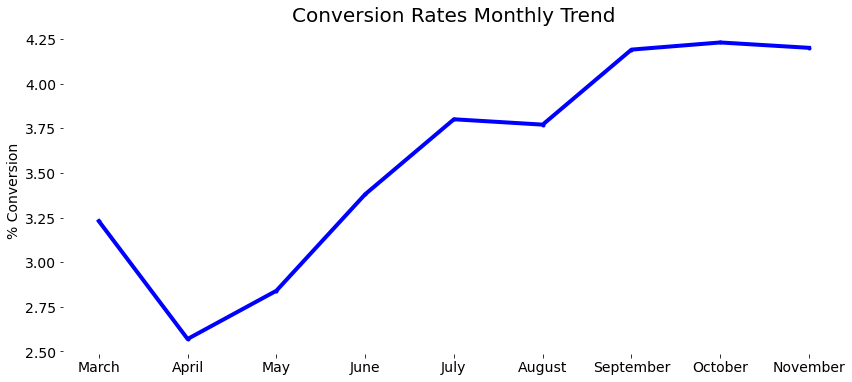

In [5]:
# Plotting conversion rates monthly trend

positions = (0, 1, 2, 3, 4, 5, 6, 7, 8)
labels = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

fig, ax = plt.subplots(1, figsize = (14, 6))
plt.plot(result_51_1['conv_rate'], linewidth = 4, color = 'blue', marker = '.')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title('Conversion Rates Monthly Trend', size = 20)
plt.xticks(positions, labels, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('% Conversion', fontsize = 14)
plt.show()

As shown in the plot, conversion rate of orders to website sessions has been increasing consistently since April, which is good news. However, it seems like there is a plateau around 4.20% conversion rate in the last three months.

A good way to look further into this result is the second derivate. Here is why:
- The first derivative is nothing less than the rate of change between two points in time, just like was done in this step. It gives an idea of **velocity** of conversion rates;
- The second derivative is the rate of change OF the rate of change, which in this case shows the **acceleration** of conversion rates over time.

In [6]:
# Adding a column representing the second derivative. This could be done through a query too, but the 'pct_change()' 
# function embedded in pandas looks like a simpler way to get the result 

result_51_1['conv_rate_change'] = round(result_51_1['conv_rate'].pct_change() * 100,2)

result_51_1.fillna(0) # The first row will return NaN, so we substitute by 0

,month,sessions,orders,conv_rate,conv_rate_change
0,3,1860,60,3.23,0.00
1,4,3574,92,2.57,-20.43
2,5,3410,97,2.84,10.51
3,6,3578,121,3.38,19.01
4,7,3811,145,3.80,12.43
5,8,4877,184,3.77,-0.79
6,9,4491,188,4.19,11.14
7,10,5534,234,4.23,0.95
8,11,8889,373,4.20,-0.71


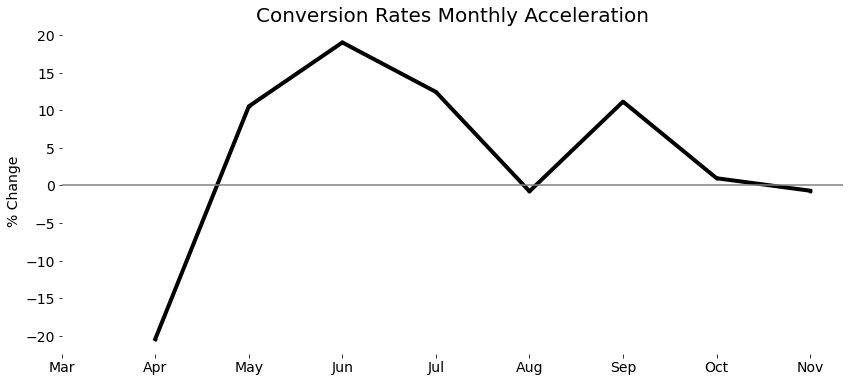

In [7]:
# Plotting the rate of change in conversion rates

positions = (0, 1, 2, 3, 4, 5, 6, 7, 8)
labels = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']

fig, ax = plt.subplots(1, figsize = (14, 6))
plt.plot(result_51_1['conv_rate_change'], linewidth = 4, color = 'black', marker = '.')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.title('Conversion Rates Monthly Acceleration', size = 20)
plt.xticks(positions, labels, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('% Change', fontsize = 14)
plt.axhline(0, color = 'grey')
plt.show()

Despite the good news about the increasing conversion rates of orders to website sessions in Gsearch, this growth has been weakened since its peak in July (except for August) and is roughly stagnant in the last two months. Here is something to be closely monitored during the next periods of time. 

---

*2.	Next, it would be great to see a similar monthly trend for Gsearch, but this time splitting out nonbrand and brand campaigns separately. I am wondering if brand is picking up at all. If so, this is a good story to tell.*

In [8]:
query_51_2 = '''
SELECT
    MONTH(ws.created_at) AS 'month', 
    COUNT(DISTINCT CASE WHEN utm_campaign = 'nonbrand' THEN ws.website_session_id ELSE NULL END) AS nonbrand_sessions, 
    COUNT(DISTINCT CASE WHEN utm_campaign = 'nonbrand' THEN o.order_id ELSE NULL END) AS nonbrand_orders,
    ROUND((COUNT(DISTINCT CASE WHEN utm_campaign = 'nonbrand' THEN o.order_id ELSE NULL END)/
            COUNT(DISTINCT CASE WHEN utm_campaign = 'nonbrand' THEN ws.website_session_id ELSE NULL END)) * 100, 2) AS nonbrand_conversion,
    COUNT(DISTINCT CASE WHEN utm_campaign = 'brand' THEN ws.website_session_id ELSE NULL END) AS brand_sessions, 
    COUNT(DISTINCT CASE WHEN utm_campaign = 'brand' THEN o.order_id ELSE NULL END) AS brand_orders,
    ROUND((COUNT(DISTINCT CASE WHEN utm_campaign = 'brand' THEN o.order_id ELSE NULL END)/
            COUNT(DISTINCT CASE WHEN utm_campaign = 'brand' THEN ws.website_session_id ELSE NULL END)) * 100, 2) AS brand_conversion
FROM website_sessions ws
LEFT JOIN orders o ON o.website_session_id = ws.website_session_id
WHERE 
    ws.created_at < '2012-11-27'
    AND ws.utm_source = 'gsearch'
GROUP BY 1; 
'''

#Observations about the query:
# - Very similar to the previous exercise, except this time the analysis is segregated by utm-source

result_51_2 = pd.read_sql_query(query_51_2, mydb)
result_51_2

,month,nonbrand_sessions,nonbrand_orders,nonbrand_conversion,brand_sessions,brand_orders,brand_conversion
0,3,1852,60,3.24,8,0,0.00
1,4,3509,86,2.45,65,6,9.23
2,5,3295,91,2.76,115,6,5.22
3,6,3439,114,3.31,139,7,5.04
4,7,3660,136,3.72,151,9,5.96
5,8,4673,174,3.72,204,10,4.90
6,9,4227,172,4.07,264,16,6.06
7,10,5197,219,4.21,337,15,4.45
8,11,8506,356,4.19,383,17,4.44


In [9]:
result_51_2.set_index('month')

,nonbrand_sessions,nonbrand_orders,nonbrand_conversion,brand_sessions,brand_orders,brand_conversion
month,,,,,,
3,1852,60,3.24,8,0,0.00
4,3509,86,2.45,65,6,9.23
5,3295,91,2.76,115,6,5.22
6,3439,114,3.31,139,7,5.04
7,3660,136,3.72,151,9,5.96
8,4673,174,3.72,204,10,4.90
9,4227,172,4.07,264,16,6.06
10,5197,219,4.21,337,15,4.45
11,8506,356,4.19,383,17,4.44


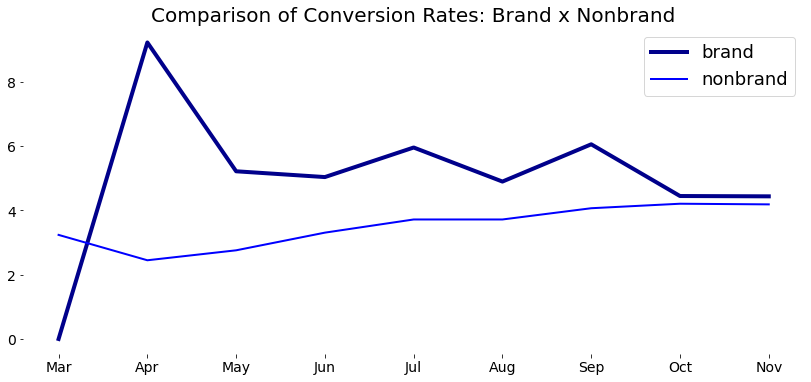

In [10]:
# Plotting conversion rates monthly trend

fig = plt.figure(figsize = (14, 6))
ax = fig.add_subplot(111)
plt.title('Comparison of Conversion Rates: Brand x Nonbrand', size = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(positions, labels, fontsize = 14)
plt.yticks(fontsize = 14)
ax.plot(result_51_2['brand_conversion'], c = 'darkblue', linewidth = 4, label = 'brand')
ax.plot(result_51_2['nonbrand_conversion'], c = 'blue', linewidth = 2, label = 'nonbrand')
plt.legend(fontsize = 18)
plt.show()

As suspected, brand campaigns picked up, but only for a while. After strong conversion rates in April, it diminished and remained stagnant between May and September although with numbers superior to nonbrand campaigns. 

In the last two months, however, brand campaigns rates converged to the same level of nonbrand campaigns.

---

*3.	While we’re on Gsearch, could you dive into nonbrand, and pull monthly sessions and orders split by device type? I want to flex our analytical muscles a little and show the board we really know our traffic sources.*

In [11]:
query_51_3 = '''
SELECT
    MONTH(ws.created_at) AS 'month', 
    COUNT(DISTINCT CASE WHEN device_type = 'desktop' THEN ws.website_session_id ELSE NULL END) AS desktop_sessions, 
    COUNT(DISTINCT CASE WHEN device_type = 'desktop' THEN o.order_id ELSE NULL END) AS desktop_orders,
    ROUND((COUNT(DISTINCT CASE WHEN device_type = 'desktop' THEN o.order_id ELSE NULL END)/
            COUNT(DISTINCT CASE WHEN device_type = 'desktop' THEN ws.website_session_id ELSE NULL END)) * 100, 2) AS desktop_conversion,
    COUNT(DISTINCT CASE WHEN device_type = 'mobile' THEN ws.website_session_id ELSE NULL END) AS mobile_sessions, 
    COUNT(DISTINCT CASE WHEN device_type = 'mobile' THEN o.order_id ELSE NULL END) AS mobile_orders,
    ROUND((COUNT(DISTINCT CASE WHEN device_type = 'mobile' THEN o.order_id ELSE NULL END)/
            COUNT(DISTINCT CASE WHEN device_type = 'mobile' THEN ws.website_session_id ELSE NULL END)) * 100, 2) AS mobile_conversion
FROM website_sessions ws
LEFT JOIN orders o ON o.website_session_id = ws.website_session_id
WHERE 
    ws.created_at < '2012-11-27'
    AND ws.utm_source = 'gsearch'
    AND ws.utm_campaign = 'nonbrand'
GROUP BY 1; 
'''
result_51_3 = pd.read_sql_query(query_51_3, mydb)
result_51_3

,month,desktop_sessions,desktop_orders,desktop_conversion,mobile_sessions,mobile_orders,mobile_conversion
0,3,1128,50,4.43,724,10,1.38
1,4,2139,75,3.51,1370,11,0.80
2,5,2276,83,3.65,1019,8,0.79
3,6,2673,106,3.97,766,8,1.04
4,7,2774,122,4.40,886,14,1.58
5,8,3515,165,4.69,1158,9,0.78
6,9,3171,155,4.89,1056,17,1.61
7,10,3934,201,5.11,1263,18,1.43
8,11,6457,323,5.00,2049,33,1.61


There are multiple ways to analyze this result. First, let's take a look at orders' growth rate for each type of device in order to assess significant differences:

In [12]:
# Desktop orders' growth rate between March and November

desktop_orders_growth = np.round(((result_51_3['desktop_orders'].iloc[-1]
                                  /result_51_3['desktop_orders'].iloc[0]) - 1) * 100, 2)

print(desktop_orders_growth,'%')

546.0 %


In [13]:
# Mobile orders' growth rate between March and November

mobile_orders_growth = np.round(((result_51_3['mobile_orders'].iloc[-1]
                                  /result_51_3['mobile_orders'].iloc[0]) - 1) * 100, 2)

print(mobile_orders_growth,'%')

230.0 %


Desktop orders' are not only higher in absolute terms, but also shows a stronger growth rate (546%) throughout the period in comparision with Mobile (230%). The result indicates the Desktop orders' grew approximately 2.5x faster than Mobile orders'.

Even though desktop is the device with higher orders' growth rate, is it more efficient with regards to conversion rates? This question can be answered with a comparative plot between both devices:

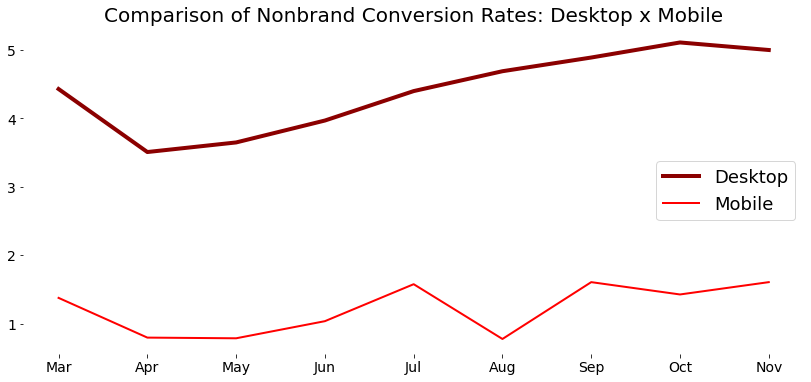

In [14]:
# Plotting the nonbrand conversion rates comparison between Desktop and Mobile

fig = plt.figure(figsize = (14, 6))
ax = fig.add_subplot(111)
plt.title('Comparison of Nonbrand Conversion Rates: Desktop x Mobile', size = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(positions, labels, fontsize = 14)
plt.yticks(fontsize = 14)
ax.plot(result_51_3['desktop_conversion'], c = 'darkred', linewidth = 4, label = 'Desktop')
ax.plot(result_51_3['mobile_conversion'], c = 'red', linewidth = 2, label = 'Mobile')
plt.legend(fontsize = 18)
plt.show()

Indeed, Desktop has been shown to be more engaging and efficient than Mobile in nonbrand campaign.

---

*4. I'm worried that one of our more pessimistic board members may be concerned about the large % of traffic from Gsearch. Can you pull monthly trends for Gsearch, alongside monthly trends for each of our other channels?*

In [15]:
# Identifying the various utm sources and referrers

pd.read_sql_query(
    '''SELECT DISTINCT
    utm_source,
    utm_campaign, 
    http_referer
    FROM website_sessions
    WHERE website_sessions.created_at < '2012-11-27';''', mydb)

,utm_source,utm_campaign,http_referer
0,gsearch,nonbrand,https://www.gsearch.com
1,None,None,None
2,gsearch,brand,https://www.gsearch.com
3,None,None,https://www.gsearch.com
4,bsearch,brand,https://www.bsearch.com
5,None,None,https://www.bsearch.com
6,bsearch,nonbrand,https://www.bsearch.com


In [16]:
# Comparing organic and direct type sessions

query_51_4 = '''
SELECT
    MONTH(ws.created_at) AS month, 
    COUNT(DISTINCT CASE WHEN utm_source = 'gsearch' THEN ws.website_session_id ELSE NULL END) AS gsearch_paid_sessions,
    COUNT(DISTINCT CASE WHEN utm_source = 'bsearch' THEN ws.website_session_id ELSE NULL END) AS bsearch_paid_sessions,
    COUNT(DISTINCT CASE WHEN utm_source IS NULL AND http_referer IS NOT NULL THEN ws.website_session_id ELSE NULL END) AS organic_search_sessions,
    COUNT(DISTINCT CASE WHEN utm_source IS NULL AND http_referer IS NULL THEN ws.website_session_id ELSE NULL END) AS direct_type_in_sessions
FROM website_sessions ws
	LEFT JOIN orders o ON o.website_session_id = ws.website_session_id
WHERE ws.created_at < '2012-11-27'
GROUP BY 1;
'''

result_51_4 = pd.read_sql_query(query_51_4, mydb)
result_51_4

,month,gsearch_paid_sessions,bsearch_paid_sessions,organic_search_sessions,direct_type_in_sessions
0,3,1860,2,8,9
1,4,3574,11,78,71
2,5,3410,25,150,151
3,6,3578,25,190,170
4,7,3811,44,207,187
5,8,4877,705,265,250
6,9,4491,1439,331,285
7,10,5534,1781,428,440
8,11,8889,2840,536,485


Organic search and direct type sessions growth is deemed very positive because these are free channels for the company, whereas Gsearch and Bsearch imply a Customer Acquisition Cost (CAC), which reduces profit margins. 

A good approach is to compare the growth rate between all channels.

In [17]:
# Calculating Gsearch Growth Rate

g_search_growth_rate = np.round(((result_51_4['gsearch_paid_sessions'].iloc[-1]
                                  /result_51_4['gsearch_paid_sessions'].iloc[0]) - 1) * 100, 2)


print(g_search_growth_rate,'%')

377.9 %


In [18]:
# Calculating Bsearch Growth Rate

b_search_growth_rate = np.round(((result_51_4['bsearch_paid_sessions'].iloc[-1]
                                  /result_51_4['bsearch_paid_sessions'].iloc[0]) - 1) * 100, 2)


print(b_search_growth_rate,'%')

141900.0 %


In [19]:
# Calculating Organic Growth Rate

organic_growth_rate = np.round(((result_51_4['organic_search_sessions'].iloc[-1]
                                  /result_51_4['organic_search_sessions'].iloc[0]) - 1) * 100, 2)


print(organic_growth_rate,'%')

6600.0 %


In [20]:
# Calculating Direct type Growth Rate

direct_growth_rate = np.round(((result_51_4['direct_type_in_sessions'].iloc[-1]
                                  /result_51_4['direct_type_in_sessions'].iloc[0]) - 1) * 100, 2)


print(direct_growth_rate,'%')

5288.89 %


Addressing the concern of the pessimistic board member, Gsearch is not the fastest-growing acquisition channel. However, it is important to calculate Gsearch's share of sessions throughout the period

In [21]:
# Adding a new column with Gsearch's share of sessions

total = [result_51_4['gsearch_paid_sessions'],result_51_4['bsearch_paid_sessions'],
         result_51_4['organic_search_sessions'],result_51_4['direct_type_in_sessions']]

result_51_4['gsearch_share'] = np.round((result_51_4['gsearch_paid_sessions']/sum(total)) * 100, 2)

result_51_4

,month,gsearch_paid_sessions,bsearch_paid_sessions,organic_search_sessions,direct_type_in_sessions,gsearch_share
0,3,1860,2,8,9,98.99
1,4,3574,11,78,71,95.72
2,5,3410,25,150,151,91.27
3,6,3578,25,190,170,90.29
4,7,3811,44,207,187,89.69
5,8,4877,705,265,250,79.99
6,9,4491,1439,331,285,68.61
7,10,5534,1781,428,440,67.63
8,11,8889,2840,536,485,69.72


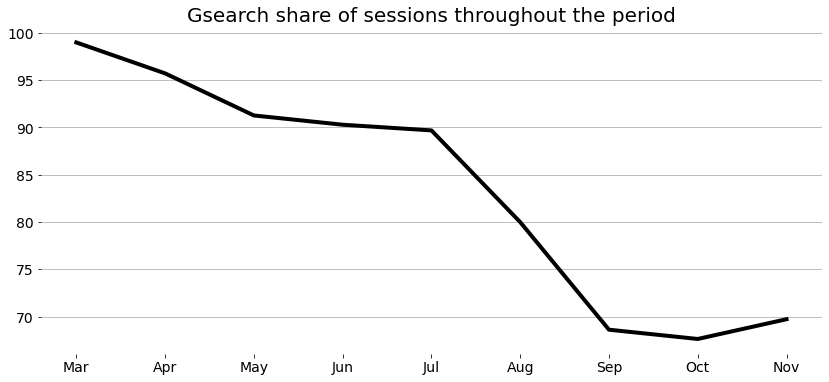

In [22]:
# Plotting Gsearch's share of sessions

fig = plt.figure(figsize = (14, 6))
ax = fig.add_subplot(111)
plt.plot(result_51_4['gsearch_share'], c = 'black', linewidth = 4)
plt.title('Gsearch share of sessions throughout the period', size = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(positions, labels, fontsize = 14)
plt.yticks(fontsize = 14)
ax.yaxis.grid()

plt.show()

Although Gsearch is by far the most relevant channel in absolute terms, its share of total sessions has been declining over time, featuring a strong growth from organic sources. This is good news. 

Therefore, no reason for pessimism from the board members over this subject.

---

*5.	I’d like to tell the story of our website performance improvements over the course of the first 8 months. Could you pull session to order conversion rates, by month?*

In [23]:
query_51_5 = '''
 SELECT
    MONTH(ws.created_at) AS month, 
    COUNT(DISTINCT ws.website_session_id) AS sessions, 
    COUNT(DISTINCT o.order_id) AS orders, 
    ROUND((COUNT(DISTINCT o.order_id)/COUNT(DISTINCT ws.website_session_id) * 100), 2) AS conv_rate    
FROM website_sessions ws
	LEFT JOIN orders o ON o.website_session_id = ws.website_session_id
WHERE ws.created_at < '2012-11-27'
GROUP BY 1;
 '''

result_51_5 = pd.read_sql_query(query_51_5, mydb)
result_51_5

,month,sessions,orders,conv_rate
0,3,1879,60,3.19
1,4,3734,99,2.65
2,5,3736,108,2.89
3,6,3963,140,3.53
4,7,4249,169,3.98
5,8,6097,228,3.74
6,9,6546,287,4.38
7,10,8183,371,4.53
8,11,12750,561,4.40


This is very similar to question 1, so this analysis will be short and straightforward.

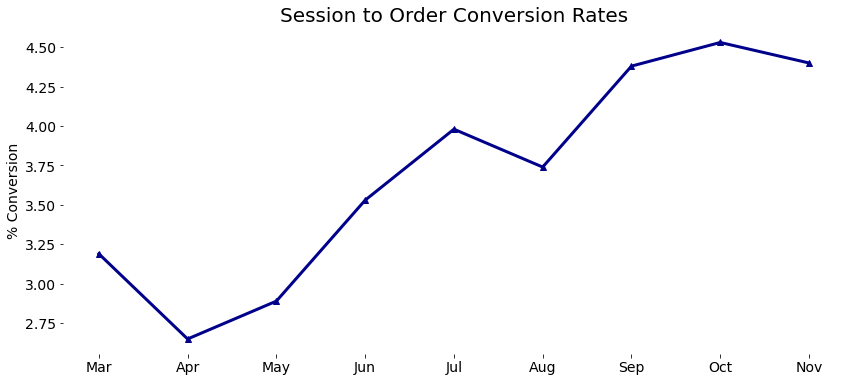

In [24]:
fig, ax = plt.subplots(1, figsize = (14, 6))
plt.plot(result_51_5['conv_rate'], linewidth = 3, color = 'darkblue', marker = '^')
plt.title('Session to Order Conversion Rates', size = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(positions, labels, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('% Conversion', fontsize = 14)
plt.show()

Session to order conversion rate has been increasing throughout the period.

---

*6. For the gsearch lander test, please estimate the revenue that test earned us (Hint: Look at the increase in CVR from the test (Jun 19 – Jul 28), and use nonbrand sessions and revenue since then to calculate incremental value)*

In [25]:
# Identifying first test of pageview lander-1

pd.read_sql_query('''
    SELECT
    MIN(website_pageview_id) AS first_test_pv
    FROM website_pageviews
    WHERE pageview_url = '/lander-1';
    ''', mydb)

,first_test_pv
0,23504


For this exercise, a slightly different method will be used to fetch queries because of the creation of temporary tables. Beyond that, the code will be divided in three blocks for a clearer understanding. 

In [26]:
cursor = mydb.cursor()

# First pageview_id of each session
cursor.execute('''
CREATE TEMPORARY TABLE first_test_pageviews
SELECT
	wp.website_session_id, 
    MIN(wp.website_pageview_id) AS min_pageview_id
FROM website_pageviews wp 
	INNER JOIN website_sessions ws ON ws.website_session_id = wp.website_session_id
	AND ws.created_at < '2012-07-28' -- prescribed by the assignment
	AND wp.website_pageview_id >= 23504 -- first page_view
    AND utm_source = 'gsearch'
    AND utm_campaign = 'nonbrand'
GROUP BY 
	wp.website_session_id;
''')

# Now, we bring in the landing page to each session, like last time, but restricting to home or lander-1
cursor.execute('''
CREATE TEMPORARY TABLE nonbrand_test_sessions_w_landing_pages
SELECT 
	first_test_pageviews.website_session_id, 
    wp.pageview_url AS landing_page
FROM first_test_pageviews
	LEFT JOIN website_pageviews wp ON wp.website_pageview_id = first_test_pageviews.min_pageview_id
WHERE wp.pageview_url IN ('/home','/lander-1');
''') 

# Then we make a table to bring in orders
cursor.execute('''
CREATE TEMPORARY TABLE nonbrand_test_sessions_w_orders
SELECT
	nonbrand_test_sessions_w_landing_pages.website_session_id, 
    nonbrand_test_sessions_w_landing_pages.landing_page, 
    o.order_id AS order_id
FROM nonbrand_test_sessions_w_landing_pages
LEFT JOIN orders o ON o.website_session_id = nonbrand_test_sessions_w_landing_pages.website_session_id
;''')

# Now we pull conversion rates for /home and /lander-1
cursor.execute('''
SELECT
	landing_page, 
    COUNT(DISTINCT website_session_id) AS sessions, 
    COUNT(DISTINCT order_id) AS orders,
    ROUND((COUNT(DISTINCT order_id)/COUNT(DISTINCT website_session_id)) * 100, 2) AS conv_rate
FROM nonbrand_test_sessions_w_orders
GROUP BY 1;
''') 

query_51_6_part1 = cursor.fetchall()

In [27]:
# Turning the result into a DataFrame

result_51_6_part1 = pd.DataFrame(query_51_6_part1, columns = ['landing_page', 'sessions', 'orders', 'conv_rate'])

result_51_6_part1

,landing_page,sessions,orders,conv_rate
0,/home,2261,72,3.18
1,/lander-1,2316,94,4.06


In [28]:
# Calculating the difference in conversion rates between /home and /lander-1

diff = result_51_6_part1.iloc[1, -1] - result_51_6_part1.iloc[0, -1]

print('The difference in conversion rate between home and lander-1 is', diff, '%')

The difference in conversion rate between home and lander-1 is 0.88 %


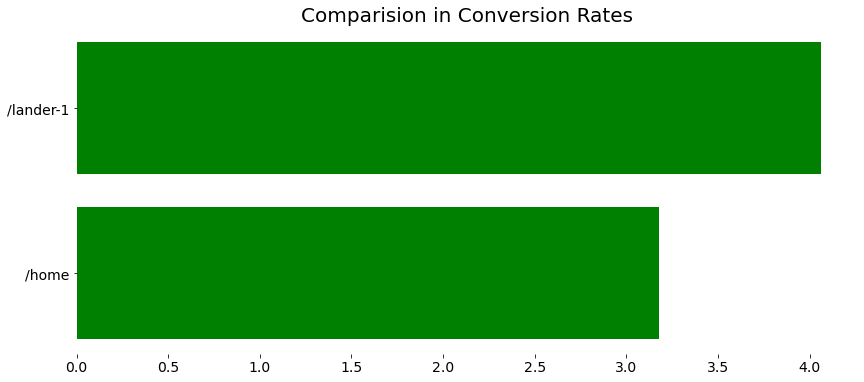

In [29]:
# Plotting the difference between both pages

fig, ax = plt.subplots(figsize = (14, 6))

plt.barh(y = result_51_6_part1['landing_page'], width = result_51_6_part1['conv_rate'], color = 'green')
plt.title('Comparision in Conversion Rates', size = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [30]:
# Finding the most recent pageview for gsearch nonbrand where the traffic was sent to /home

query_51_6_part2 = '''
 SELECT 
	MAX(ws.website_session_id) AS most_recent_gsearch_nonbrand_home_pageview 
FROM website_sessions ws
	LEFT JOIN website_pageviews wp ON wp.website_session_id = ws.website_session_id
WHERE utm_source = 'gsearch'
	AND utm_campaign = 'nonbrand'
    AND pageview_url = '/home'
    AND ws.created_at < '2012-11-27';
 '''

result_51_6_part2 = pd.read_sql_query(query_51_6_part2, mydb)
result_51_6_part2

,most_recent_gsearch_nonbrand_home_pageview
0,17145


In [31]:
# Calculating website sessions since the test

query_51_6 = '''
SELECT 
	COUNT(website_session_id) AS sessions_since_test
FROM website_sessions
WHERE created_at < '2012-11-27'
	AND website_session_id > 17145 -- last /home session
	AND utm_source = 'gsearch'
	AND utm_campaign = 'nonbrand';
 '''

result_51_6 = pd.read_sql_query(query_51_6, mydb)
result_51_6

,sessions_since_test
0,22972


In [32]:
# Calculating incremental orders earned by Gsearch lander-1

increment = result_51_6 * diff/100

increment

,sessions_since_test
0,202.1536


There were 22,972 website sessions since the test with an incremental conversion rate of 0.88%, which translates into 202 incremental orders since 07-29. Considering almost 4 months of test, there were roughly 50 extra orders per month. 

Good performance.

---

*7.	For the landing page test you analyzed previously, it would be great to show a full conversion funnel from each of the two pages to orders. You can use the same time period you analyzed last time (Jun 19 – Jul 28).*

In [33]:
query_51_7_part1 ='''
SELECT
	ws.website_session_id, 
    wp.pageview_url, 
    wp.created_at AS pageview_created_at, 
    CASE WHEN pageview_url = '/home' THEN 1 ELSE 0 END AS homepage,
    CASE WHEN pageview_url = '/lander-1' THEN 1 ELSE 0 END AS custom_lander,
    CASE WHEN pageview_url = '/products' THEN 1 ELSE 0 END AS products_page,
    CASE WHEN pageview_url = '/the-original-mr-fuzzy' THEN 1 ELSE 0 END AS mrfuzzy_page, 
    CASE WHEN pageview_url = '/cart' THEN 1 ELSE 0 END AS cart_page,
    CASE WHEN pageview_url = '/shipping' THEN 1 ELSE 0 END AS shipping_page,
    CASE WHEN pageview_url = '/billing' THEN 1 ELSE 0 END AS billing_page,
    CASE WHEN pageview_url = '/thank-you-for-your-order' THEN 1 
    ELSE 0 END AS thankyou_page
FROM website_sessions ws LEFT JOIN website_pageviews wp ON ws.website_session_id = wp.website_session_id
WHERE 
    ws.utm_source = 'gsearch' 
	AND ws.utm_campaign = 'nonbrand' 
    AND ws.created_at < '2012-07-28'
	AND ws.created_at > '2012-06-19'
ORDER BY 
	ws.website_session_id,
    wp.created_at;
'''

result_51_7_part1 = pd.read_sql_query(query_51_7_part1, mydb)

result_51_7_part1

,website_session_id,pageview_url,pageview_created_at,homepage,custom_lander,products_page,mrfuzzy_page,cart_page,shipping_page,billing_page,thankyou_page
0,11683,/lander-1,2012-06-19 00:35:54,0,1,0,0,0,0,0,0
1,11684,/home,2012-06-19 00:48:25,1,0,0,0,0,0,0,0
2,11685,/lander-1,2012-06-19 01:02:38,0,1,0,0,0,0,0,0
3,11686,/lander-1,2012-06-19 01:31:57,0,1,0,0,0,0,0,0
4,11686,/products,2012-06-19 01:32:51,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9659,16989,/products,2012-07-27 23:13:45,0,0,1,0,0,0,0,0
9660,16990,/home,2012-07-27 23:13:25,1,0,0,0,0,0,0,0
9661,16990,/products,2012-07-27 23:19:00,0,0,1,0,0,0,0,0
9662,16990,/the-original-mr-fuzzy,2012-07-27 23:22:56,0,0,0,1,0,0,0,0


In [34]:
cursor.execute('''
CREATE TEMPORARY TABLE session_level_made_it_flagged
SELECT
	website_session_id, 
    MAX(homepage) AS saw_homepage, 
    MAX(custom_lander) AS saw_custom_lander,
    MAX(products_page) AS product_made_it, 
    MAX(mrfuzzy_page) AS mrfuzzy_made_it, 
    MAX(cart_page) AS cart_made_it,
    MAX(shipping_page) AS shipping_made_it,
    MAX(billing_page) AS billing_made_it,
    MAX(thankyou_page) AS thankyou_made_it
FROM(
    SELECT
        ws.website_session_id, 
        wp.pageview_url, 
        wp.created_at AS pageview_created_at, 
        CASE WHEN pageview_url = '/home' THEN 1 ELSE 0 END AS homepage,
        CASE WHEN pageview_url = '/lander-1' THEN 1 ELSE 0 END AS custom_lander,
        CASE WHEN pageview_url = '/products' THEN 1 ELSE 0 END AS products_page,
        CASE WHEN pageview_url = '/the-original-mr-fuzzy' THEN 1 ELSE 0 END AS mrfuzzy_page, 
        CASE WHEN pageview_url = '/cart' THEN 1 ELSE 0 END AS cart_page,
        CASE WHEN pageview_url = '/shipping' THEN 1 ELSE 0 END AS shipping_page,
        CASE WHEN pageview_url = '/billing' THEN 1 ELSE 0 END AS billing_page,
        CASE WHEN pageview_url = '/thank-you-for-your-order' THEN 1 
        ELSE 0 END AS thankyou_page
    FROM website_sessions ws LEFT JOIN website_pageviews wp ON ws.website_session_id = wp.website_session_id
WHERE 
    ws.utm_source = 'gsearch' 
	AND ws.utm_campaign = 'nonbrand' 
    AND ws.created_at < '2012-07-28'
	AND ws.created_at > '2012-06-19'
ORDER BY 
	ws.website_session_id,
    wp.created_at
) AS pageview_level
GROUP BY 
	website_session_id
''') 

query_51_7_part2 = cursor.fetchall()

In [35]:
# Assessing conversion funnel in custom-lander and homepage

query_51_7_part3 ='''
SELECT
	CASE 
	WHEN saw_homepage = 1 THEN 'saw_homepage'
    WHEN saw_custom_lander = 1 THEN 'saw_custom_lander'
    ELSE 'wrong' END AS segment, 
    COUNT(DISTINCT website_session_id) AS sessions,
    COUNT(DISTINCT CASE WHEN product_made_it = 1 THEN website_session_id ELSE NULL END) AS to_products,
    COUNT(DISTINCT CASE WHEN mrfuzzy_made_it = 1 THEN website_session_id ELSE NULL END) AS to_mrfuzzy,
    COUNT(DISTINCT CASE WHEN cart_made_it = 1 THEN website_session_id ELSE NULL END) AS to_cart,
    COUNT(DISTINCT CASE WHEN shipping_made_it = 1 THEN website_session_id ELSE NULL END) AS to_shipping,
    COUNT(DISTINCT CASE WHEN billing_made_it = 1 THEN website_session_id ELSE NULL END) AS to_billing,
    COUNT(DISTINCT CASE WHEN thankyou_made_it = 1 THEN website_session_id ELSE NULL END) AS to_thankyou
FROM session_level_made_it_flagged 
GROUP BY 1;
'''

result_51_7_part3 = pd.read_sql_query(query_51_7_part3, mydb)

result_51_7_part3

,segment,sessions,to_products,to_mrfuzzy,to_cart,to_shipping,to_billing,to_thankyou
0,saw_custom_lander,2316,1083,772,348,231,197,94
1,saw_homepage,2261,942,684,296,200,168,72


In [36]:
# Extracting conversion funnel rates along each step

query_51_7 ='''
SELECT
	CASE 
	WHEN saw_homepage = 1 THEN 'saw_homepage'
    WHEN saw_custom_lander = 1 THEN 'saw_custom_lander'
    ELSE 'uh oh... check logic' 
	END AS segment, 
	ROUND((COUNT(DISTINCT CASE WHEN product_made_it = 1 THEN website_session_id ELSE NULL END)/COUNT(DISTINCT website_session_id)) * 100, 2) AS lander_click_rt,
    ROUND((COUNT(DISTINCT CASE WHEN mrfuzzy_made_it = 1 THEN website_session_id ELSE NULL END)/COUNT(DISTINCT CASE WHEN product_made_it = 1 THEN website_session_id ELSE NULL END)) * 100, 2) AS products_click_rt,
    ROUND((COUNT(DISTINCT CASE WHEN cart_made_it = 1 THEN website_session_id ELSE NULL END)/COUNT(DISTINCT CASE WHEN mrfuzzy_made_it = 1 THEN website_session_id ELSE NULL END)) * 100, 2) AS mrfuzzy_click_rt,
    ROUND((COUNT(DISTINCT CASE WHEN shipping_made_it = 1 THEN website_session_id ELSE NULL END)/COUNT(DISTINCT CASE WHEN cart_made_it = 1 THEN website_session_id ELSE NULL END)) * 100, 2) AS cart_click_rt,
    ROUND((COUNT(DISTINCT CASE WHEN billing_made_it = 1 THEN website_session_id ELSE NULL END)/COUNT(DISTINCT CASE WHEN shipping_made_it = 1 THEN website_session_id ELSE NULL END)) * 100, 2) AS shipping_click_rt,
    ROUND((COUNT(DISTINCT CASE WHEN thankyou_made_it = 1 THEN website_session_id ELSE NULL END)/COUNT(DISTINCT CASE WHEN billing_made_it = 1 THEN website_session_id ELSE NULL END)) * 100, 2) AS billing_click_rt
FROM session_level_made_it_flagged
GROUP BY 1;
'''

result_51_7 = pd.read_sql_query(query_51_7, mydb)

result_51_7

,segment,lander_click_rt,products_click_rt,mrfuzzy_click_rt,cart_click_rt,shipping_click_rt,billing_click_rt
0,saw_custom_lander,46.76,71.28,45.08,66.38,85.28,47.72
1,saw_homepage,41.66,72.61,43.27,67.57,84.00,42.86


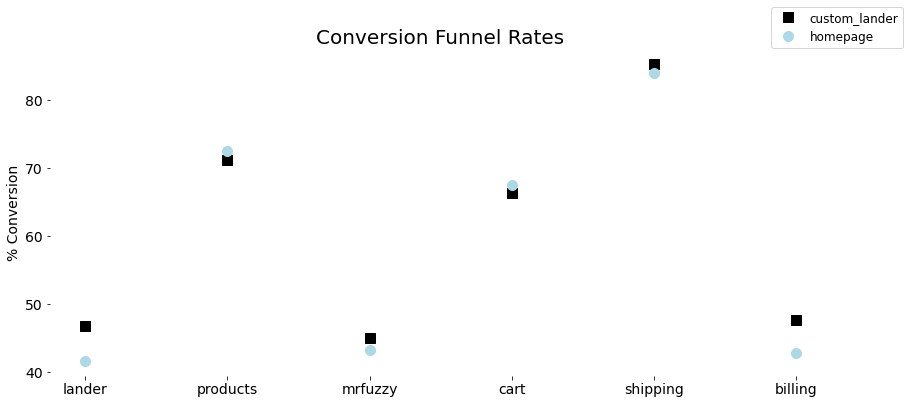

In [37]:
# Plotting conversion funnel rates for both pages

# Transposing the dataframe
df_t = result_51_7.transpose()
df_t.columns = df_t.iloc[0]
df_t = df_t.drop(df_t.index[0]) 

# Preparing some aspects of the plot
labels1 = ['lander', 'products', 'mrfuzzy', 'cart', 'shipping', 'billing']
positions1 = [0, 1, 2, 3, 4, 5]
custom_lander = df_t['saw_custom_lander'] 
homepage = df_t['saw_homepage']

fig, ax = plt.subplots(1, figsize = (14, 6))
plt.title('Conversion Funnel Rates', size = 20)
ax.plot(custom_lander, c = 'black', linestyle = 'None', marker = 's', markersize = 10)
ax.plot(homepage, c = 'lightblue', linestyle = 'None', marker = 'o', markersize = 10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(positions1, labels1, fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('% Conversion', fontsize = 14)
ax.legend(['custom_lander', 'homepage'], fontsize = 12, bbox_to_anchor = (1.1, 1.15))

plt.show()

It is worth to highlight that the custom-lander page showed a better conversion funnel than the homepage with higher rates of conversion in lander, mr. fuzzy, shipping and billing, which is the most important one from the standpoint of revenue. Beyond that, this final step of the funnel for custom-lander showed the highest difference when compared to the homepage: +5,14% conversion rate.

---

*8.	I’d love for you to quantify the impact of our billing test, as well. Please analyze the lift generated from the test (Sep 10 – Nov 10), in terms of revenue per billing page session, and then pull the number of billing page sessions for the past month to understand monthly impact.*

In [38]:
query_51_8_part1 = '''
SELECT
	billing_version_seen, 
    COUNT(DISTINCT website_session_id) AS sessions, 
    ROUND(SUM(price_usd)/COUNT(DISTINCT website_session_id), 2) AS revenue_per_billing_page_seen
 FROM( 
SELECT 
	wp.website_session_id, 
    wp.pageview_url AS billing_version_seen, 
    o.order_id, 
    o.price_usd
FROM website_pageviews wp
	LEFT JOIN orders o ON o.website_session_id = wp.website_session_id
WHERE 
    wp.created_at > '2012-09-10'
	AND wp.created_at < '2012-11-10' 
    AND wp.pageview_url IN ('/billing','/billing-2')
) AS billing_pageviews_and_order_data
GROUP BY 1
'''

result_51_8_part1 = pd.read_sql_query(query_51_8_part1, mydb)

result_51_8_part1

,billing_version_seen,sessions,revenue_per_billing_page_seen
0,/billing,657,22.83
1,/billing-2,654,31.34


In [39]:
old_version = result_51_8_part1.iloc[0,-1]
new_version = result_51_8_part1.iloc[1,-1]

diff = np.round(new_version - old_version, 2)

diff

8.51

Here is the financial impact of the billing test:
- 22.83 for the older version;
- 31.34 for the new version.

$8.51 revenue per billing page difference. Quite a significant result.

In [40]:
query_51_8 = '''
SELECT 
	COUNT(website_session_id) AS billing_sessions_past_month
FROM website_pageviews wp
WHERE 
    pageview_url IN ('/billing','/billing-2') 
	AND created_at BETWEEN '2012-10-27' AND '2012-11-27'
'''

result_51_8 = pd.read_sql_query(query_51_8, mydb)

result_51_8

,billing_sessions_past_month
0,1193


In [41]:
total_billing_test = diff * result_51_8

total_billing_test

,billing_sessions_past_month
0,10152.43


Considering a total of 1193 billing sessions past month, total value of billing test was 10,152.43 for the period.

---

This is how I tried to promote synergy between MySQL and Python in order to execute a thorough business analysis. Thank you for reading this work and bear in mind that I'm a beginner, therefore, if you have some tips on best practices of coding, I would really appreciate.

---

Author: Renan Pereira Bento